<a href="https://colab.research.google.com/github/AwkwaBear/EE-628/blob/main/sg13g2_LDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Design and Optimization of Analog LDO Using sg13g2 PDK with Relational Graph Neural Network and Reinforcement Learning


|Name|
|:--:|
|Vikas Shukla |
|Zion McDowell|
|Jie Zhao|
|Anthony Gasbarro|


### Install dependencies

## First we follow a modified version of the [Dockerfile](https://github.com/iic-jku/IIC-OSIC-TOOLS/blob/main/_build/Dockerfile) build Script from the [IIC-OSIC-Tools Github Page](https://github.com/iic-jku/IIC-OSIC-TOOLS/tree/main)

This script is adapted one section at a time to the Google Colab environment's syntax

- sg13g2 [Process Development Kit]
- Ngspice [Circuit Simulation Tool]
- Conda [Python Development Virtual Environment]
- Pytorch [Machine Learning Framework]
- PyG [Graph Neural Network Library]
- Tabulate [Data Table Export Interface Library]

Note: that after the installation of these packages, **you may need to restart the runtime to use these newly installed packages**.

In [1]:
import os

# install conda.
CONDA_PREFIX = os.environ.get('CONDA_PREFIX', None)
if not CONDA_PREFIX:
  !python -m pip install condacolab
  import condacolab
  condacolab.install()

✨🍰✨ Everything looks OK!


## Install PDK and Simulation Tools

### Install IHP Open PDK

In [2]:
# clone pdk
!git clone https://github.com/IHP-GmbH/IHP-Open-PDK.git

fatal: destination path 'IHP-Open-PDK' already exists and is not an empty directory.


#### Install OpenVaf (Verilog-A Compiler)

In [3]:
# install openvaf and compile models
!wget https://openva.fra1.cdn.digitaloceanspaces.com/openvaf_23_5_0_linux_amd64.tar.gz
!tar -xf openvaf_23_5_0_linux_amd64.tar.gz
!./openvaf ./IHP-Open-PDK/ihp-sg13g2/libs.tech/ngspice/openvaf/psp103_nqs.va
!cp ./IHP-Open-PDK/ihp-sg13g2/libs.tech/ngspice/openvaf/psp103_nqs.osdi .


--2024-02-26 22:38:24--  https://openva.fra1.cdn.digitaloceanspaces.com/openvaf_23_5_0_linux_amd64.tar.gz
Resolving openva.fra1.cdn.digitaloceanspaces.com (openva.fra1.cdn.digitaloceanspaces.com)... 104.18.13.192, 104.18.12.192, 2606:4700::6812:cc0, ...
Connecting to openva.fra1.cdn.digitaloceanspaces.com (openva.fra1.cdn.digitaloceanspaces.com)|104.18.13.192|:443... connected.
HTTP request sent, awaiting response... 200 OK
Cookie coming from openva.fra1.cdn.digitaloceanspaces.com attempted to set domain to digitaloceanspaces.com
Length: 54596847 (52M) [application/gzip]
Saving to: ‘openvaf_23_5_0_linux_amd64.tar.gz.1’

openvaf_23_5_0_linu 100%[===================>]  52.07M  91.0MB/s    in 0.6s    

2024-02-26 22:38:25 (91.0 MB/s) - ‘openvaf_23_5_0_linux_amd64.tar.gz.1’ saved [54596847/54596847]

Finished building psp103_nqs.va in 31.12s


#### Install Ngspice


In [4]:
# clone ngspice
!apt install bison flex libx11-dev libx11-6 libxaw7-dev libreadline6-dev autoconf libtool automake -y
!git clone https://git.code.sf.net/p/ngspice/ngspice

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libreadline-dev' instead of 'libreadline6-dev'
autoconf is already the newest version (2.71-2).
automake is already the newest version (1:1.16.5-1.3).
bison is already the newest version (2:3.8.2+dfsg-1build1).
flex is already the newest version (2.6.4-8build2).
libreadline-dev is already the newest version (8.1.2-1).
libtool is already the newest version (2.4.6-15build2).
libxaw7-dev is already the newest version (2:1.0.14-1).
libx11-6 is already the newest version (2:1.7.5-1ubuntu0.3).
libx11-dev is already the newest version (2:1.7.5-1ubuntu0.3).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
fatal: destination path 'ngspice' already exists and is not an empty directory.


In [5]:

# compile ngspice
!cd ngspice && ./compile_linux.sh

Running libtoolize
libtoolize: putting auxiliary files in '.'.
libtoolize: copying file './ltmain.sh'
libtoolize: putting macros in AC_CONFIG_MACRO_DIRS, 'm4'.
libtoolize: copying file 'm4/libtool.m4'
libtoolize: copying file 'm4/ltoptions.m4'
libtoolize: copying file 'm4/ltsugar.m4'
libtoolize: copying file 'm4/ltversion.m4'
libtoolize: copying file 'm4/lt~obsolete.m4'
Running aclocal 
Running autoheader
Running automake -Wall --copy --add-missing
configure.ac:42: installing './compile'
configure.ac:37: installing './missing'
src/Makefile.am: installing './depcomp'
Running autoconf
configure.ac:967: warning: The macro `AC_TRY_LINK' is obsolete.
configure.ac:967: You should run autoupdate.
./lib/autoconf/general.m4:2920: AC_TRY_LINK is expanded from...
configure.ac:967: the top level
configure.ac:1099: warning: AC_PROG_LEX without either yywrap or noyywrap is obsolete
./lib/autoconf/programs.m4:716: _AC_PROG_LEX is expanded from...
./lib/autoconf/programs.m4:709: AC_PROG_LEX is expande

## Install Other Python Tools

In [6]:
# Install Pytorch with cpu-only option.
!conda install pytorch==1.13.1 torchvision==0.14.1 torchaudio==0.13.1 cpuonly -c pytorch

# Check the version of Python (should be larger than 3.7) and Pytorch.
import torch
import sys
print("Python version")
print (sys.version)

!python -c "import torch; print(torch.__version__)"
!python -c "import torch; print(torch.version.cuda)"

# Install PyG to enable graph neural networks. We need to manually guide Colab to install the correct version of PyG based on which Pytorch version we have installed
# (https://colab.research.google.com/drive/17VFsRZeZa7rgtrQ39-RMiYIE0ePrSlgN?authuser=1#scrollTo=rFwf_0DrvXLv). In this case it is 1.13.1 with cpu-only option.
!pip install torch-scatter -f https://pytorch-geometric.com/whl/torch-1.13.1+cpu.html
!pip install torch-sparse -f https://pytorch-geometric.com/whl/torch-1.13.1+cpu.html
!pip install torch-cluster -f https://pytorch-geometric.com/whl/torch-1.13.1+cpu.html
!pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-1.13.1+cpu.html
!pip install torch-geometric

# Check the version of PyG.
import torch_geometric
print(torch_geometric.__version__)

# Install Gymnasium for the RL environment.
!pip install gymnasium

# Check Gymnasium version.
import gymnasium as gym
print(gym.__version__)

# Install tabulate for showing simulation results nicely during the runtime later.
!pip install tabulate

# Similarly, check tabulate version.
import tabulate
print(tabulate.__version__)

Channels:
 - pytorch
 - conda-forge
Platform: linux-64
Solving environment: / - \ | / done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.1.2

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.

Python version
3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
1.13.1
None
Looking in links: https://pytorch-geometric.com/whl/torch-1.13.1+cpu.html
Looking in links: https://pytorch-geometric.com/whl/torch-1.13.1+cpu.html
Looking in links: https://pytorch-geometric.com/whl/torch-1.13.1+cpu.html
Looking in links: https://pytorch-geometric.com/whl/torch-1.13.1+cpu.html
2.5.0
0.29.1
0.9.0


In [18]:
!pip install colab-xterm
%load_ext colabxterm
%xterm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.6/115.6 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.4/435.4 kB 4.4 MB/s eta 0:00:00


Launching Xterm...

<IPython.core.display.Javascript object>

### Setting up SG13g2 circuit simulation environment


Create some directory to organize files.

Setting up Ngspice initialization for g13g2. Also do use 8 threads to speed up simulations.

In [7]:
%%writefile .spiceinit
* ngspice initialization for SG13G2
* assert BSIM compatibility mode with "nf" vs. "W"
set ngbehavior=hsa
* "nomodcheck" speeds up loading time
set ng_nomodcheck
set num_threads=8

Overwriting .spiceinit


In [8]:
%%writefile netlist.spice
* NMOS & PMOS VGS sweep

.lib "IHP-Open-PDK/ihp-sg13g2/libs.tech/ngspice/models/cornerMOSlv.lib" mos_tt

.param width=5u
X1 dn gn 0 0 sg13_lv_nmos w=width l=0.13u
vd    dn 0        dc   0.9
vg    gn 0        dc   0.9
X2 dp gp 0 0 sg13_lv_pmos w=width l=0.13u
ed    dp 0 dn 0 -1
eg    gp 0 gn 0 -1
.op
.option post brief nomod
.end

.control
pre_osdi ./psp103_nqs.osdi
save @n.x1.nsg13_lv_nmos[gm] @n.x1.nsg13_lv_nmos[ids] @n.x1.nsg13_lv_nmos[cgg] @n.x2.nsg13_lv_pmos[gm] @n.x2.nsg13_lv_pmos[ids] @n.x2.nsg13_lv_pmos[cgg]
dc vg 0 1.3 0.01
wrdata output.txt @n.x1.nsg13_lv_nmos[gm] @n.x1.nsg13_lv_nmos[ids] @n.x1.nsg13_lv_nmos[cgg] @n.x2.nsg13_lv_pmos[gm] @n.x2.nsg13_lv_pmos[ids] @n.x2.nsg13_lv_pmos[cgg]
.endc

Overwriting netlist.spice


In [27]:
%%writefile inverter_test.spice

.lib "IHP-Open-PDK/ihp-sg13g2/libs.tech/ngspice/models/cornerMOSlv.lib" mos_tt

**.subckt Inverter_test
V2 VDD VSS 1.2
V3 VSS GND 0
V1 Vin VSS dc {vdd} pulse(0 {vdd} 0 10n 10n 5u 10u)
XM3 Vout2 Vin VSS VSS sg13_lv_nmos W=1.50u L=0.45u ng=1 m=6
XM1 Vout2 Vin VDD VDD sg13_lv_pmos W=4.0u L=0.45u ng=1 m=6
**** begin user architecture code

.param temp=27 vdd=1.2 Il=2m
.model mysw SW vt={vdd/2} ron=10k roff=10gig reltol=1e-4
.control
save all i(*)
tran 1n 500u
*plot Vout2
write tb_ideal_inverter.raw
wrdata output.txt
.endc


*.lib /foss/pdks/sg13g2/libs.tech/ngspice/models/cornerMOSlv.lib mos_tt
*.lib /foss/pdks/sg13g2/libs.tech/ngspice/models/cornerRES.lib res_typ
**.lib /foss/pdks/sg13g2/libs.tech/ngspice/models/sg13g2_moslv_mod.lib
**.lib /foss/pdks/sg13g2/libs.tech/ngspice/models/sg13g2_moslv_parm.lib mos_tt
**.lib /foss/pdks/sg13g2/libs.tech/ngspice/models/sg13g2_moslv_stat.lib mos_tt

**** end user architecture code
**.ends
.GLOBAL GND
.end


Overwriting inverter_test.spice


In [31]:
!ngspice -b inverter_test.spice


Note: Compatibility modes selected: hs a


Circuit: 

  .model xm3:sg13g2_lv_nmos_psp pspnqs103va type=+1 level=103.60 tr=27.0 d ...
Unknown model type pspnqs103va - ignored

  .model xm3:sg13g2_lv_pmos_psp pspnqs103va type=-1 level=103.60 tr=27.0 d ...
Unknown model type pspnqs103va - ignored

Error on line:
  n.xm3.nsg13_lv_nmos vout2 vin vss vss xm3:sg13g2_lv_nmos_psp w=    1.500000000000000e-06     l=    4.500000000000000e-07     mult=    1.000000000000000e+00     as=    5.099999999999999e-13     ad=    5.099999999999999e-13     ps=    3.680000000000000e-06     pd=    3.680000000000000e-06     dta=    0.000000000000000e+00     ngcon=2
could not find a valid modelname
    Simulation interrupted due to error!

Note: No ".plot", ".print", or ".fourier" lines; no simulations run


# Test Cells Below

In [29]:
import math
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("output.txt", delim_whitespace=True, header=None)
df.columns = ["vgs", "gmn", "", "idn", "", "cggn", "", "gmp", "", "idp", "", "cggp"]
df['gm_id_n'] = df['gmn']/df['idn']
df['fT_n'] = df['gmn']/df['cggn']/2/math.pi
df['gm_id_p'] = df['gmp']/df['idp']
df['fT_p'] = df['gmp']/df['cggp']/2/math.pi
df['fT_n_tot'] = df['gmn']/(df['cggn']+6e-15)/2/math.pi
df['fT_p_tot'] = df['gmp']/(df['cggp']+6e-15)/2/math.pi

In [30]:

plt.semilogy(df['Time'], df['Vout2'], label="N")
plt.semilogy(df['vgs'], df['idp'], label="P")
plt.xlabel("Time")
plt.ylabel("Vout")
plt.legend(loc="lower right")
plt.grid()
plt.show()


KeyError: 'Time'

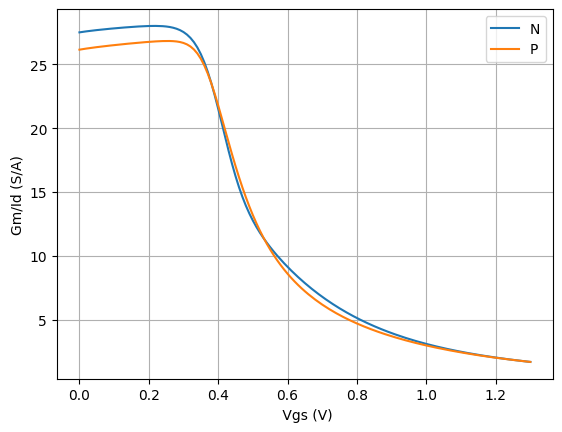

In [12]:
plt.plot(df['vgs'], df['gm_id_n'], label="N")
plt.plot(df['vgs'], df['gm_id_p'], label="P")
plt.xlabel(" Vgs (V)")
plt.ylabel("Gm/Id (S/A)")
plt.legend(loc="upper right")
plt.grid()
plt.show()

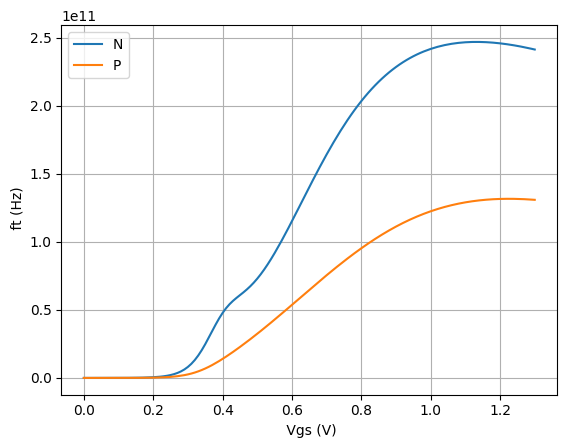

In [13]:

plt.plot(df['vgs'], df['fT_n'], label="N")
plt.plot(df['vgs'], df['fT_p'], label="P")
plt.xlabel(" Vgs (V)")
plt.ylabel(" ft (Hz)")
plt.legend(loc="upper left")
plt.grid()
plt.show()

In [14]:
#Strange kink in NMOS fT. Also, the peak value is too large for this technology (?), probably because I am not including cgsol and cgdol. On the other hand, why are these so large?
#cgsol           2.63377e-15           3.19575e-15
#cgdol           2.42174e-15           3.02492e-15

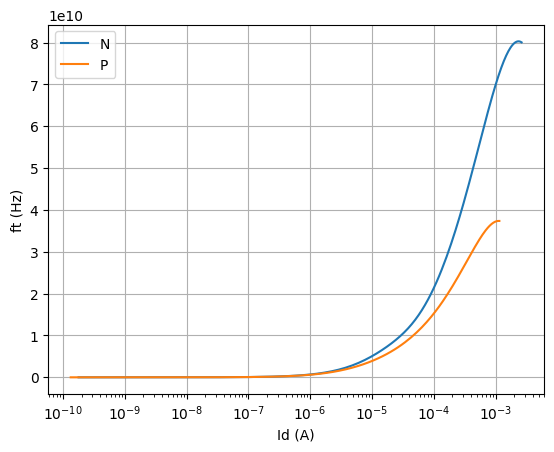

In [15]:
#For the NMOS, the gate-source overlap capacitance is ~3.2fF/5um = 0.64 fF/um. This is about twice as large as I have seen in other 0.13um technologies.


plt.semilogx(df['idn'], df['fT_n_tot'], label="N")
plt.semilogx(df['idp'], df['fT_p_tot'], label="P")
plt.xlabel("Id (A)")
plt.ylabel("ft (Hz)")
plt.legend(loc="upper left")
plt.grid()
plt.show()

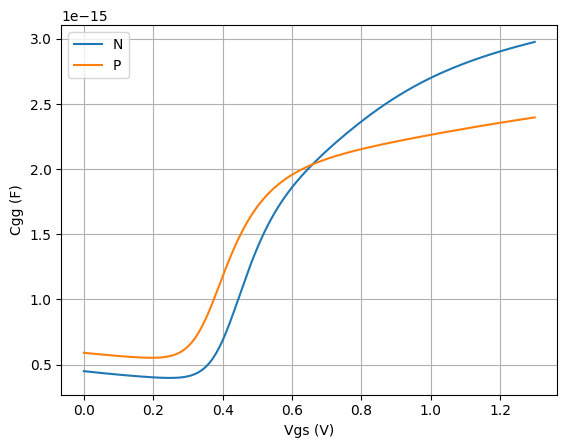

In [16]:
plt.plot(df['vgs'], df['cggn'], label="N")
plt.plot(df['vgs'], df['cggp'], label="P")
plt.xlabel("Vgs (V)")
plt.ylabel("Cgg (F)")
plt.legend(loc="upper left")
plt.grid()
plt.show()


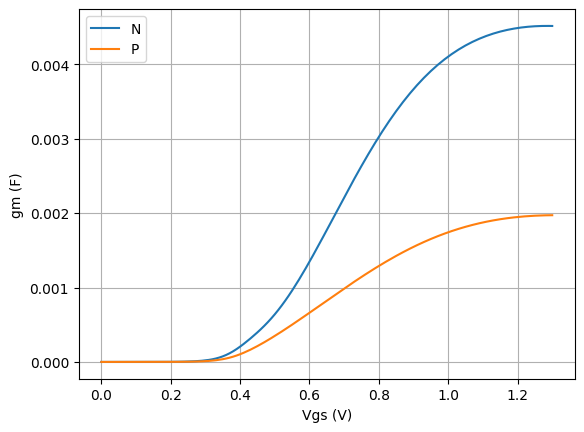

In [17]:

plt.plot(df['vgs'], df['gmn'], label="N")
plt.plot(df['vgs'], df['gmp'], label="P")
plt.xlabel("Vgs (V)")
plt.ylabel("gm (F)")
plt.legend(loc="upper left")
plt.grid()
plt.show()